## Importando o as bibliotecas e o dataset

In [114]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy

# Configurando o ambiente
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.style.use("Solarize_Light2")

In [115]:
# Importando a base de dados
df = pd.read_csv("data/bank-additional-full.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


## Análisando o dataset

In [116]:
# Dimensões da tabela
linhas_df_original = df.shape[0]
colunas_df_original = df.shape[1]
print(f'Linhas: {linhas_df_original}')
print(f'Colunas: {colunas_df_original}')

Linhas: 41188
Colunas: 21


In [117]:
# Verificando dados nulos
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [118]:
# Verificando dados duplicados
df.duplicated().sum()

12

In [119]:
# Verificando a classificação dos dados
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [120]:
df['y'] = df['y'].map(lambda x: 1 if x == 'yes' else 0)
df['y'].value_counts(normalize=True)

y
0   0.89
1   0.11
Name: proportion, dtype: float64

In [121]:
# Convertendo variáveis categóricas para o tipo "category"
categorical_columns = df[['job', 'marital', 'education', 'default', 'housing', 'loan',
                        'contact','poutcome']].columns
df[categorical_columns] = df[categorical_columns].astype('category')
# Verificando a classificação dos dados novamente
df.dtypes

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month               object
day_of_week         object
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                    int64
dtype: object

### Análisando as colunas numéricas

In [122]:
# Análisando o minimo, máximo e média de algumas colunas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Criando um loop para verificar os dados de cada coluna
for col in numerical_columns:
    minimo = df[col].min()
    maximo = df[col].max()
    media = df[col].mean()
    mediana = df[col].median()
    moda = df[col].mode()[0]
    var = df[col].var()
    std = df[col].std()
    print(f'{col}: Mínimo: {minimo} | Máximo: {maximo} | Média: {media} | Mediana: {mediana} | Moda: {moda} | Variância: {var} | Desvio Padrão: {std}')
    print('')

age: Mínimo: 17 | Máximo: 98 | Média: 40.02406040594348 | Mediana: 38.0 | Moda: 31 | Variância: 108.60245116512178 | Desvio Padrão: 10.421249980934235

duration: Mínimo: 0 | Máximo: 4918 | Média: 258.2850101971448 | Mediana: 180.0 | Moda: 85 | Variância: 67225.72887720143 | Desvio Padrão: 259.2792488364648

campaign: Mínimo: 1 | Máximo: 56 | Média: 2.567592502670681 | Mediana: 2.0 | Moda: 1 | Variância: 7.672975027861115 | Desvio Padrão: 2.7700135429021127

pdays: Mínimo: 0 | Máximo: 999 | Média: 962.4754540157328 | Mediana: 999.0 | Moda: 999 | Variância: 34935.68728443533 | Desvio Padrão: 186.9109073447436

previous: Mínimo: 0 | Máximo: 7 | Média: 0.17296299893172767 | Mediana: 0.0 | Moda: 0 | Variância: 0.24492707882612333 | Desvio Padrão: 0.4949010798393183

emp.var.rate: Mínimo: -3.4 | Máximo: 1.4 | Média: 0.08188550063125165 | Mediana: 1.1 | Moda: 1.4 | Variância: 2.4679145063259655 | Desvio Padrão: 1.5709597405172309

cons.price.idx: Mínimo: 92.201 | Máximo: 94.767 | Média: 93.57

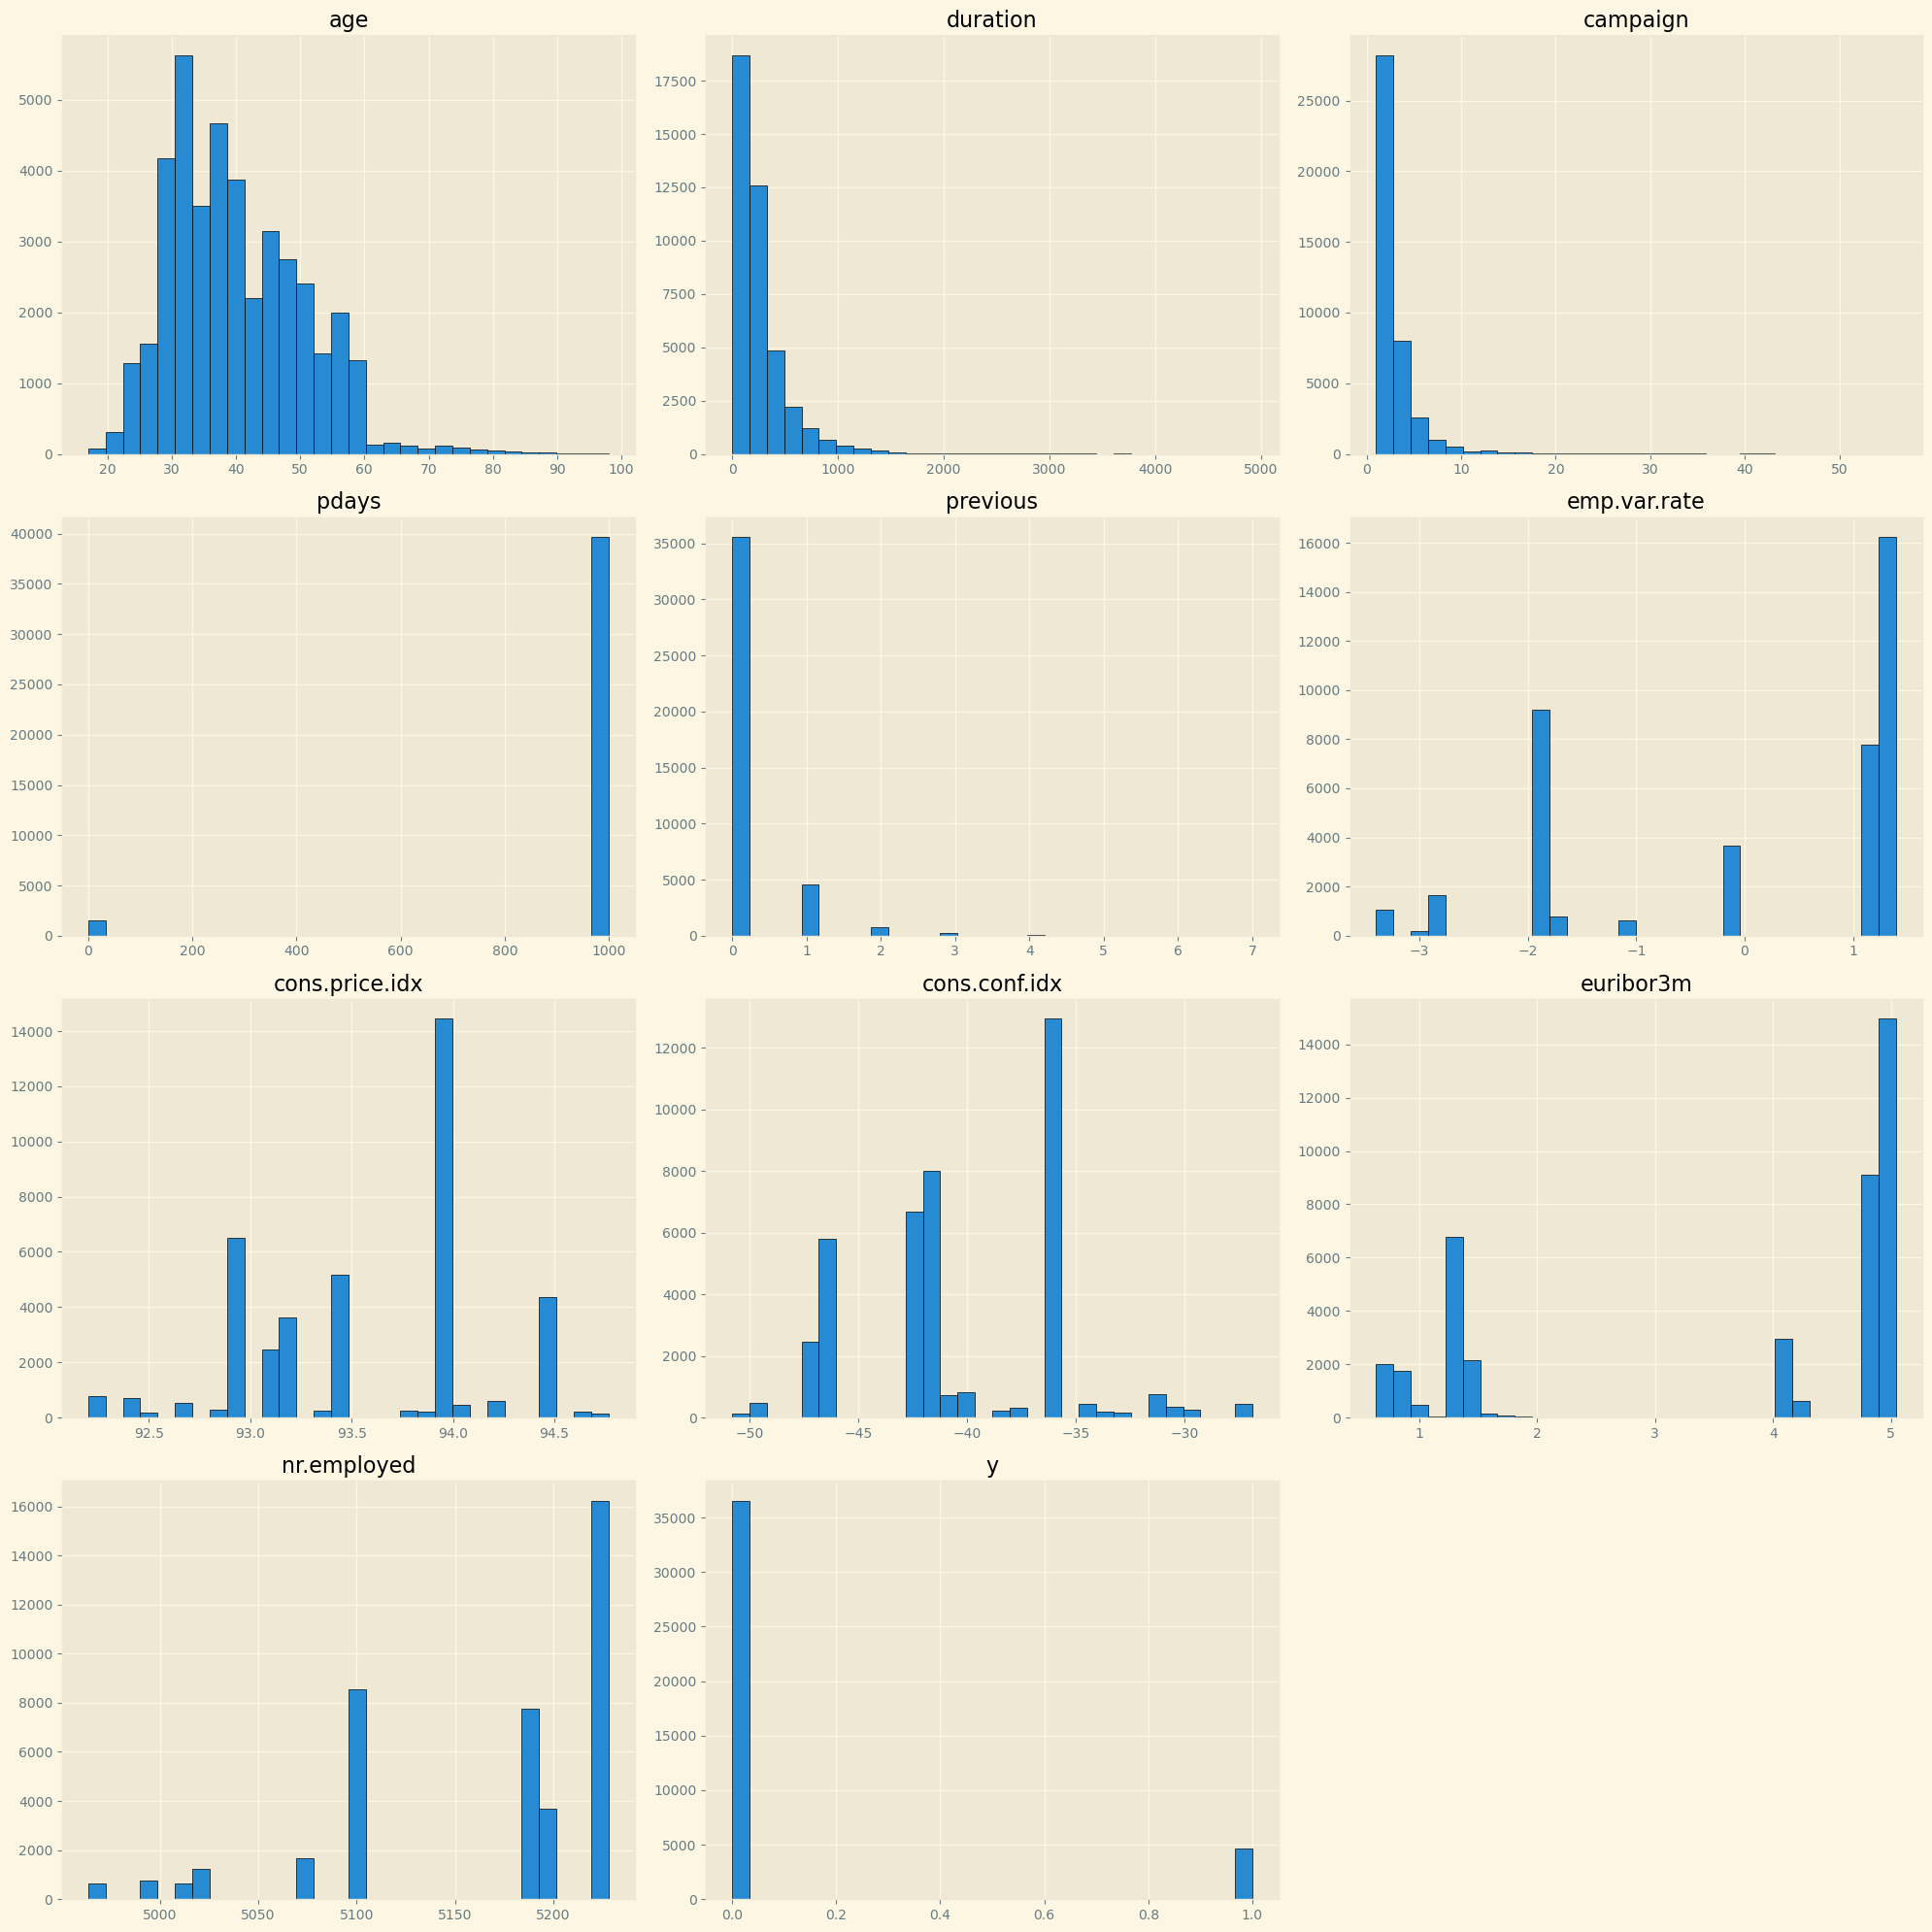

In [123]:
# Verificando a distribuição das variáveis numéricas
axes = df.hist(figsize=(20, 20), bins=30, edgecolor='black')
for ax in axes.flatten():
    ax.set_title(ax.get_title(), color='black')
plt.tight_layout()

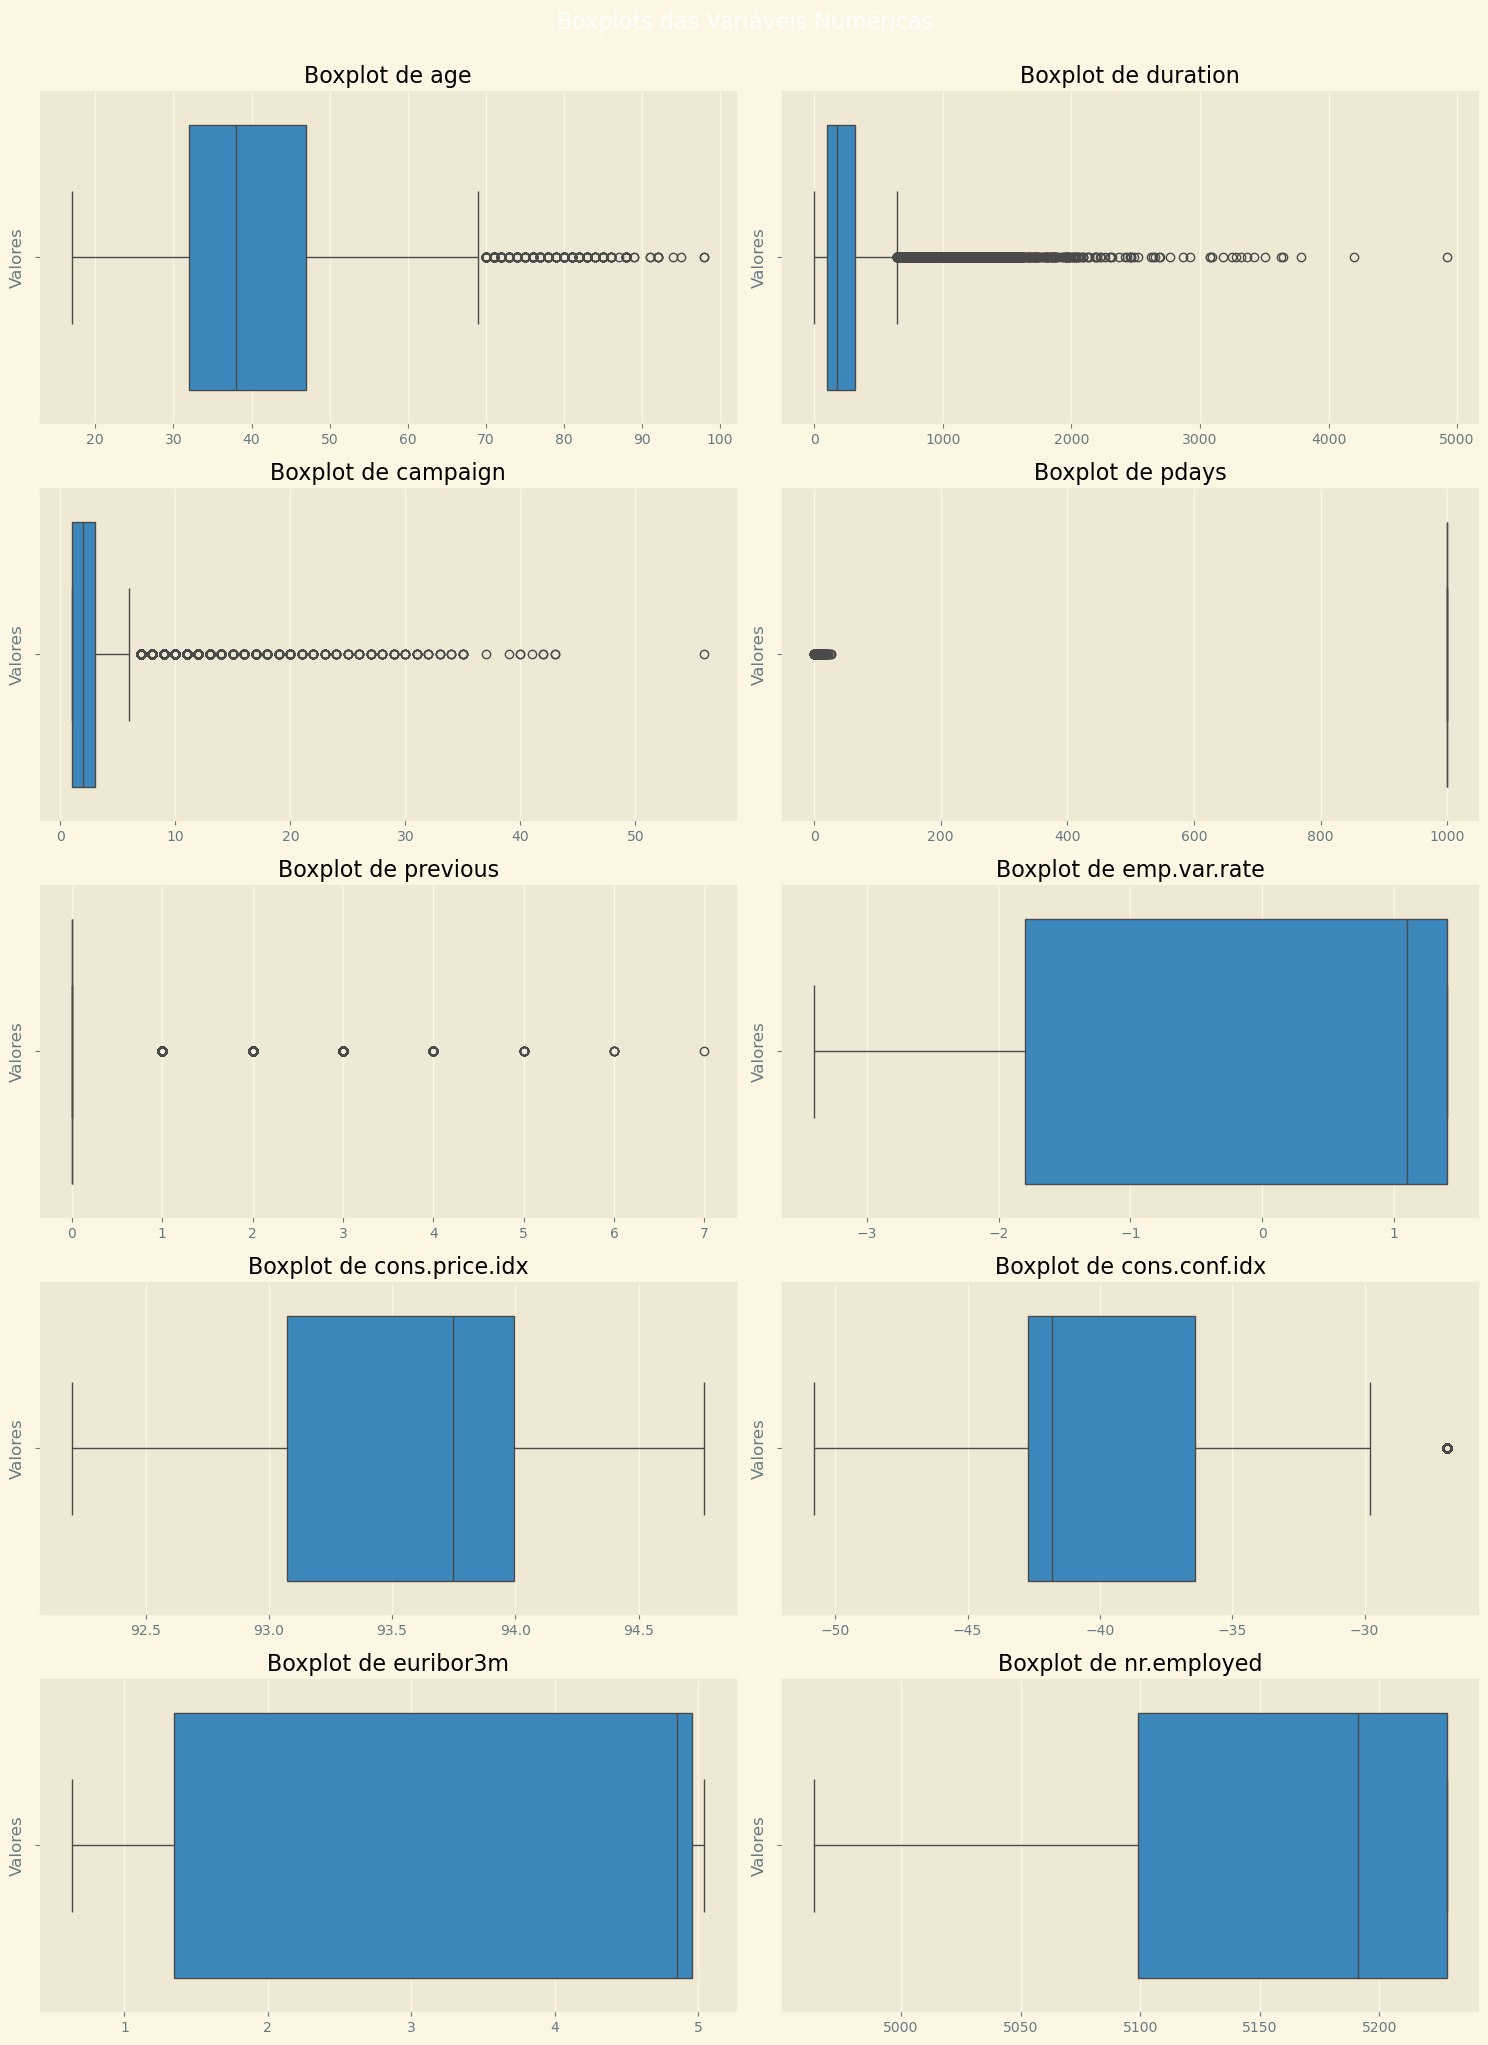

In [125]:
# Criar um subplot grid com 5 linhas e 2 colunas
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()  # Transformar o array 2D de eixos em um array 1D para indexação mais fácil

# Plotar cada coluna numérica em seu próprio subplot
for i, col in enumerate(numerical_columns):
    if i < len(axes):  # Garantir que não excedemos o número de subplots
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'Boxplot de {col}', color='black')
        axes[i].set_xlabel('')  # Remover rótulo do eixo x para uma aparência mais limpa
        axes[i].set_ylabel('Valores')  # Adicionar rótulo do eixo y em português

# Caso tenhamos menos colunas numéricas que subplots, esconder os subplots não utilizados
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Ajustar o layout para evitar sobreposição
plt.suptitle('Boxplots das Variáveis Numéricas', fontsize=16, y=1.02)  # Título geral em português
plt.show()

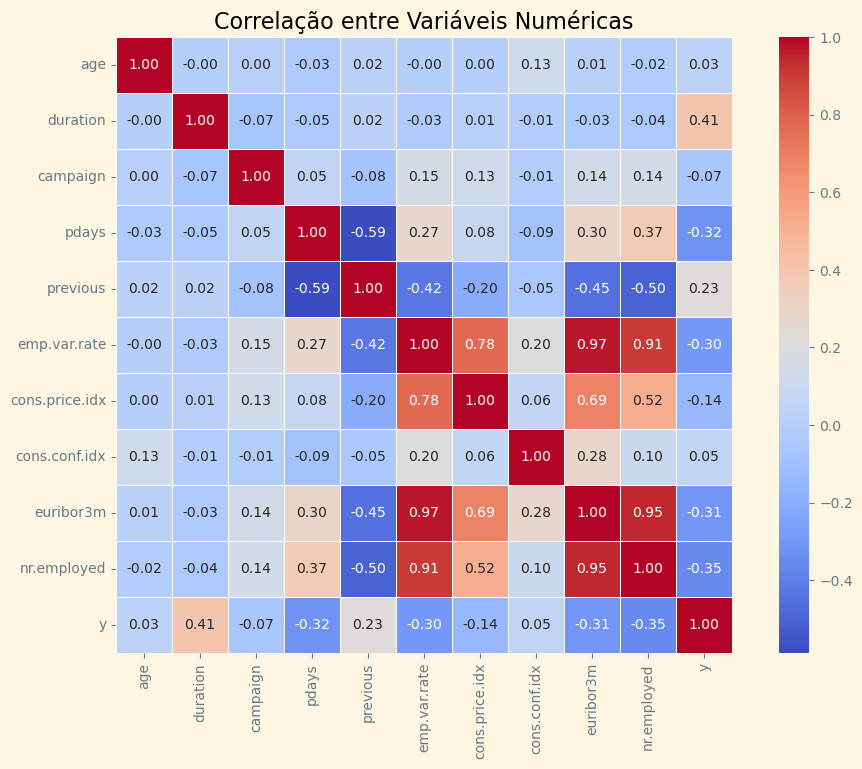

In [131]:
corr = df[numerical_columns].corr()
plt.figure(figsize=(12, 8))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title('Correlação entre Variáveis Numéricas', fontsize=16, color='black')
plt.show()

### Análisando as colunas categóricas

In [126]:
# Estatísticas descritivas para variáveis categóricas
df.describe(include='category').T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
poutcome,41188,3,nonexistent,35563


In [127]:
df.select_dtypes(include='category').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome'],
      dtype='object')

In [128]:
for col in df.select_dtypes(include='category').columns:
    print(f'Coluna: {col}')
    print(df[col].value_counts(normalize=True).head(10))
    print('\n')

Coluna: job
job
admin.          0.25
blue-collar     0.22
technician      0.16
services        0.10
management      0.07
retired         0.04
entrepreneur    0.04
self-employed   0.03
housemaid       0.03
unemployed      0.02
Name: proportion, dtype: float64


Coluna: marital
marital
married    0.61
single     0.28
divorced   0.11
unknown    0.00
Name: proportion, dtype: float64


Coluna: education
education
university.degree     0.30
high.school           0.23
basic.9y              0.15
professional.course   0.13
basic.4y              0.10
basic.6y              0.06
unknown               0.04
illiterate            0.00
Name: proportion, dtype: float64


Coluna: default
default
no        0.79
unknown   0.21
yes       0.00
Name: proportion, dtype: float64


Coluna: housing
housing
yes       0.52
no        0.45
unknown   0.02
Name: proportion, dtype: float64


Coluna: loan
loan
no        0.82
yes       0.15
unknown   0.02
Name: proportion, dtype: float64


Coluna: contact
contact
cellula

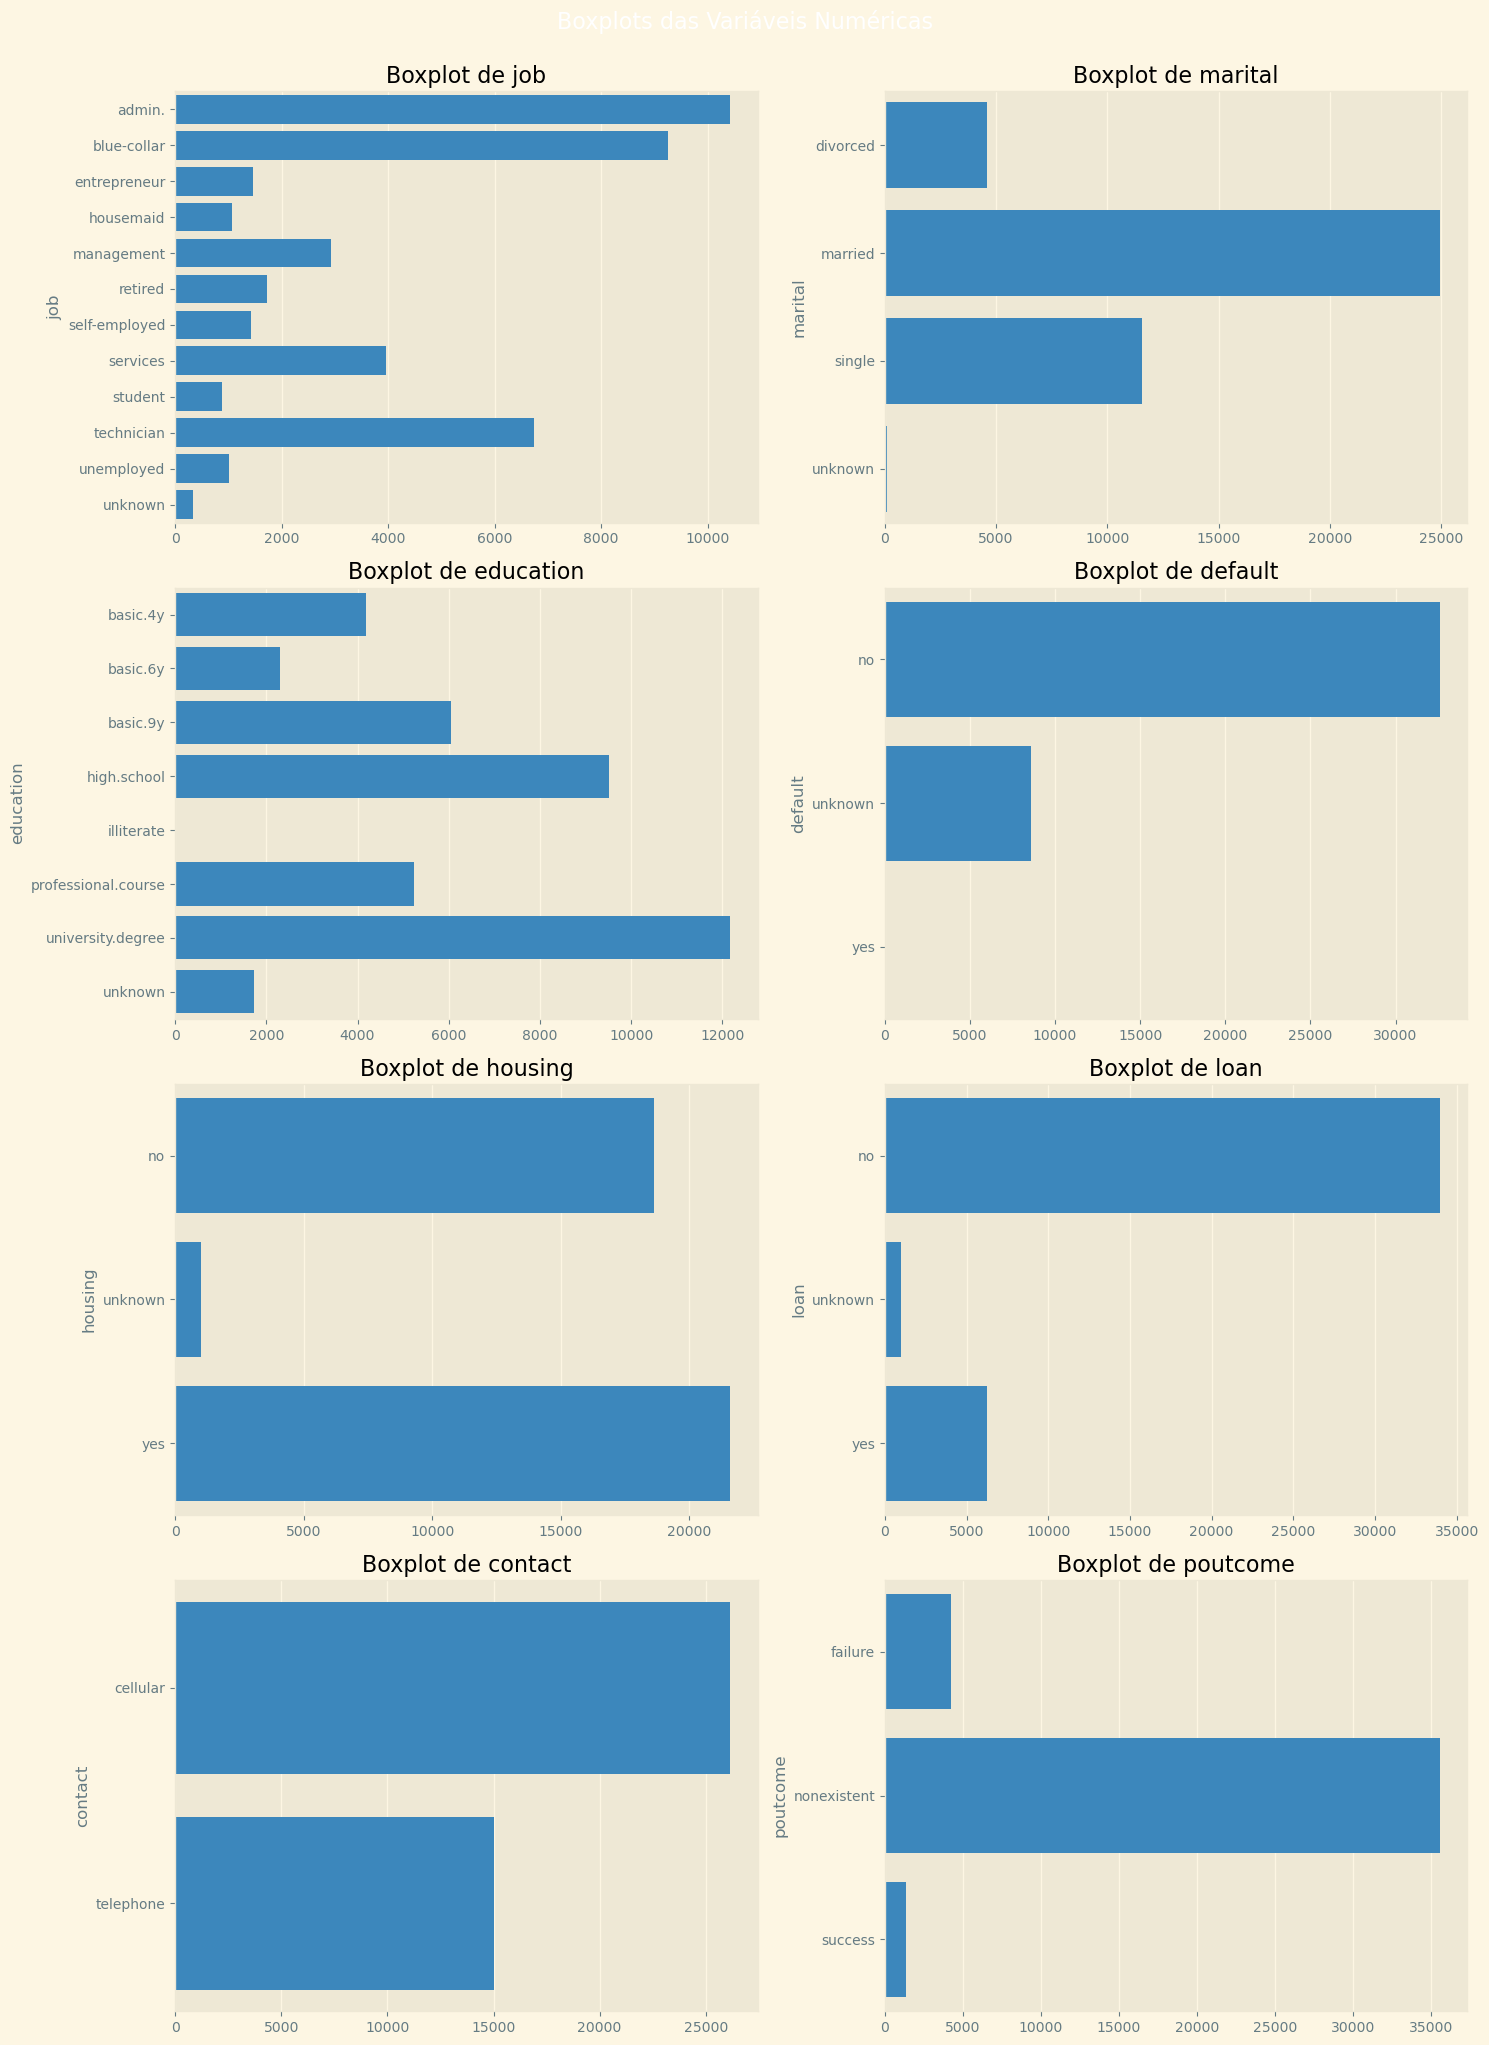

In [150]:
# Criar um subplot grid com 5 linhas e 2 colunas
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

# Plotar cada coluna numérica em seu próprio subplot
for i, col in enumerate(categorical_columns):
    if i < len(axes):
        sns.countplot(df[col], ax=axes[i])
        axes[i].set_title(f'Boxplot de {col}', color='black')
        axes[i].set_xlabel('')
        

plt.tight_layout()
plt.suptitle('Boxplots das Variáveis Numéricas', fontsize=16, y=1.02)
plt.show()

<Figure size 1400x1200 with 0 Axes>

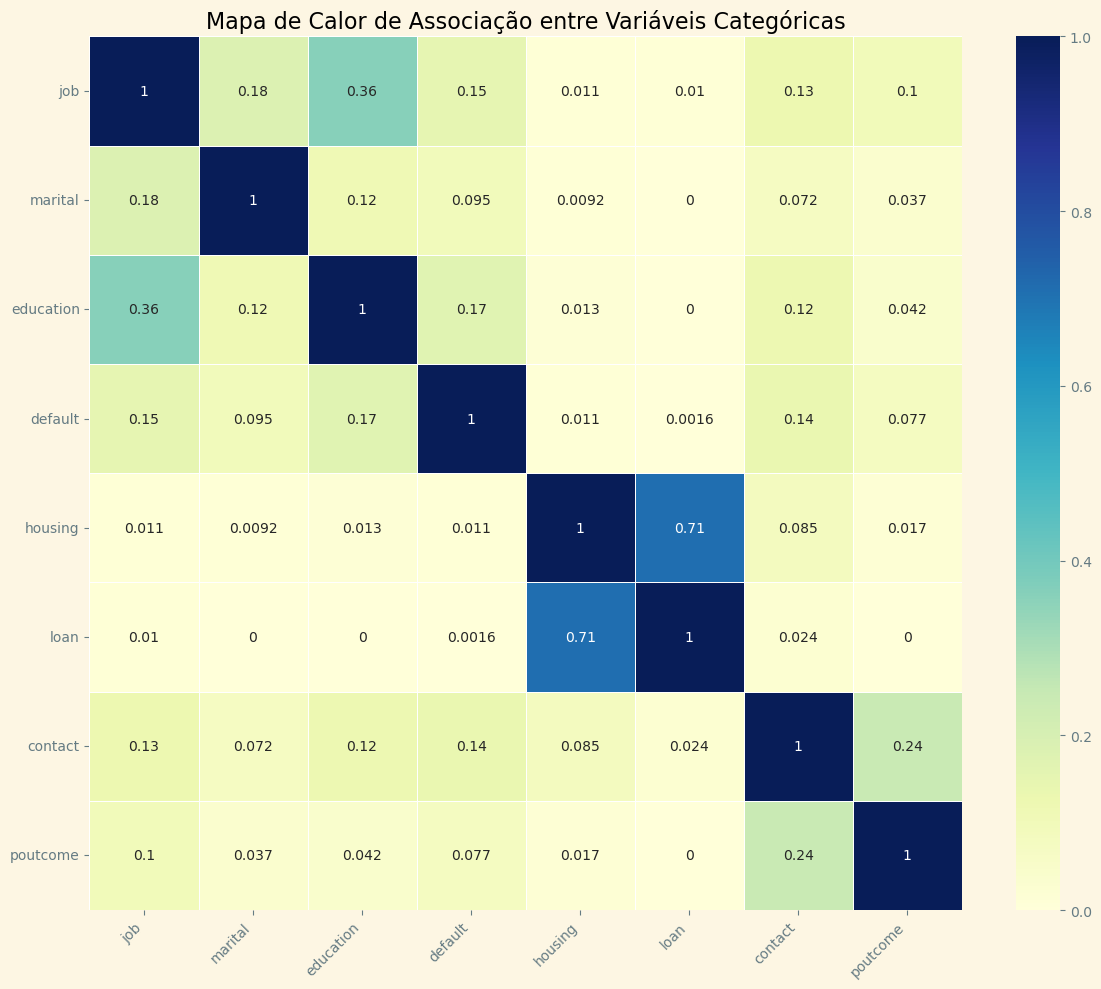

In [132]:
# Criar uma matriz de contingência para cada par de variáveis categóricas
plt.figure(figsize=(14, 12))

# Definir um mapa de cores
cmap = sns.color_palette("YlGnBu", as_cmap=True)

# Criar matriz para armazenar coeficientes de contingência
n_cols = len(categorical_columns)
assoc_matrix = np.zeros((n_cols, n_cols))

# Calcular o coeficiente de Cramer's V para cada par de variáveis
for i, col1 in enumerate(categorical_columns):
    for j, col2 in enumerate(categorical_columns):
        if i == j:
            # Diagonal principal: correlação perfeita (1.0)
            assoc_matrix[i, j] = 1.0
        else:
            # Criar tabela de contingência
            contingency = pd.crosstab(df[col1], df[col2])
            
            # Calcular o qui-quadrado
            chi2, p, dof, expected = scipy.stats.chi2_contingency(contingency)
            
            # Calcular Cramer's V (medida de associação para variáveis categóricas)
            n = contingency.sum().sum()
            phi2 = chi2 / n
            r, k = contingency.shape
            phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
            r_corr = r - (r-1)**2/(n-1)
            k_corr = k - (k-1)**2/(n-1)
            cramer_v = np.sqrt(phi2corr / min(k_corr-1, r_corr-1))
            
            assoc_matrix[i, j] = cramer_v

# Criar o heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(
    assoc_matrix, 
    annot=True, 
    cmap=cmap, 
    xticklabels=categorical_columns,
    yticklabels=categorical_columns,
    linewidths=0.5
)

plt.title('Mapa de Calor de Associação entre Variáveis Categóricas', fontsize=16, color='black')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()